# PROBLEM STATEMENT 1

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

# PROJECT OBJECTIVE 

Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

# DATA DESCRIPTION

(1) The walmart.csv contains 6435 rows and 8 columns.
(2) 8 columns are ---
    store, date, weekly_sales, holiday_flag, temperature, fuel_price, CPI, Unemployment
(3) Corresponding description for these feature are   
    Store number, week of sales, sales for the given store in that week, if it is a holiday week, tempertaure on the day of sale, cost of the fuel in that region, consumer price index, unemployment rate
    

# DATA PRE-PROCESSING STEPS AND INSPIRATION

Overview of the data

In [1]:
# importing the necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
# Data exploration

df.shape

(6435, 8)

In [4]:
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4636,33,01-04-2011,232769.09,0,71.41,3.772,128.719935,8.687
3156,23,16-04-2010,1288823.72,0,44.25,2.885,131.980900,5.435
3035,22,17-09-2010,918285.97,0,62.49,2.716,136.633807,8.433
230,2,07-10-2011,1837553.43,0,69.92,3.285,216.695831,7.441
2515,18,16-09-2011,845715.37,0,66.23,3.809,136.314500,8.890


In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [9]:
df.duplicated().sum()

0

In [10]:
# how is the correlation between the columns

df.corr()['Weekly_Sales']

Store          -0.335332
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64

In [11]:
print(df.columns.to_list())

['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [12]:
# Converting the date column from object to datetime

df.Date = pd.to_datetime(df.Date)
df.Date.dtype

dtype('<M8[ns]')

In [13]:
df['year'], df['month'] = df['Date'].dt.year, df['Date'].dt.month
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
1892,14,2010-09-24,1879891.13,0,68.59,2.713,182.669674,8.743,2010,9
3860,27,2012-10-26,1703047.74,0,58.99,4.071,142.762411,8.000,2012,10
4328,31,2010-10-29,1257921.28,0,67.51,2.716,211.566113,8.163,2010,10
2588,19,2010-05-14,1437319.45,0,46.53,3.112,132.152129,8.185,2010,5
582,5,2010-04-16,306858.69,0,65.30,2.808,211.038853,6.465,2010,4


In [14]:
# Checking for top 10 largest Sales

df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price']].nlargest(10,'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
1905,14,2010-12-24,3818686.45,0,30.59,3.141
2763,20,2010-12-24,3766687.43,0,25.17,3.141
1333,10,2010-12-24,3749057.69,0,57.06,3.236
527,4,2011-12-23,3676388.98,0,35.92,3.103
1762,13,2010-12-24,3595903.20,0,34.90,2.846
1814,13,2011-12-23,3556766.03,0,24.76,3.186
2815,20,2011-12-23,3555371.03,0,40.19,3.389
475,4,2010-12-24,3526713.39,0,43.21,2.887
1385,10,2011-12-23,3487986.89,0,48.36,3.541
189,2,2010-12-24,3436007.68,0,49.97,2.886


Store 14 has the most weekly_sales, while store 20,10,13,4 have are in top 10 twice

In [15]:
# Convert the numerical columns to categorical
# we convert the store column to categorical since each Value is unique store no
df.Store = pd.Categorical(df.Store)
df.Store.dtype

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
, ordered=False)

In [16]:
df['Holiday_Flag'] = pd.Categorical(df.Holiday_Flag)
df.Holiday_Flag.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [17]:
# checking the maximum and minimum of the date column to see the dtarting and ending point of saled data dates

print(df.Date.max())
print(df.Date.min())

2012-12-10 00:00:00
2010-01-10 00:00:00


In [18]:
# A custom IQR function

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
print(df[["Temperature","CPI", "Fuel_Price", "Unemployment"]].agg([iqr,np.mean,np.median]))

        Temperature         CPI  Fuel_Price  Unemployment
iqr       27.480000   81.008293    0.802000      1.731000
mean      60.663782  171.578394    3.358607      7.999151
median    62.670000  182.616521    3.445000      7.874000


In [19]:
# Analysis by store

Store = df.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
Store[:5]

Weekly_Sales                          
               mean         max           sum
Store                                        
1      1.555264e+06  2387950.20  2.224028e+08
2      1.925751e+06  3436007.68  2.753824e+08
3      4.027044e+05   605990.41  5.758674e+07
4      2.094713e+06  3676388.98  2.995440e+08
5      3.180118e+05   507900.07  4.547569e+07

Visualizing the data

In [20]:
plt.style.use('seaborn-darkgrid')

Line chart to view trend across stores for Total weekly_sales column

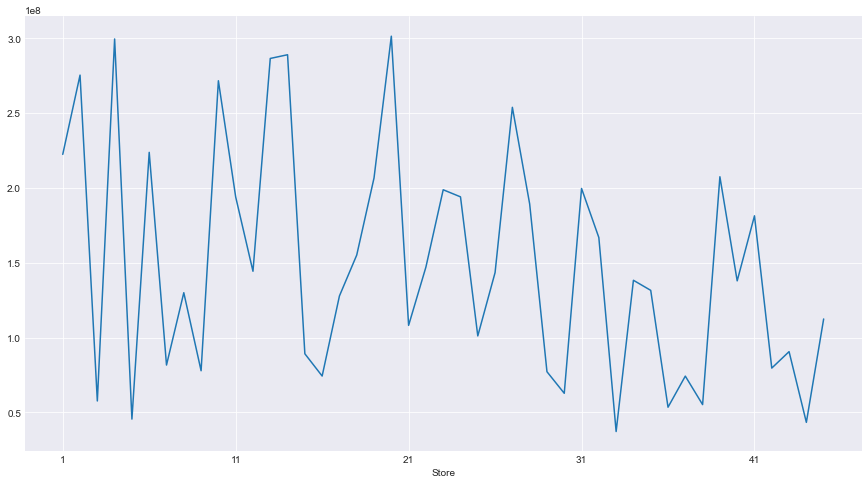

In [21]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot()
plt.show()

Bar chart for better analysis

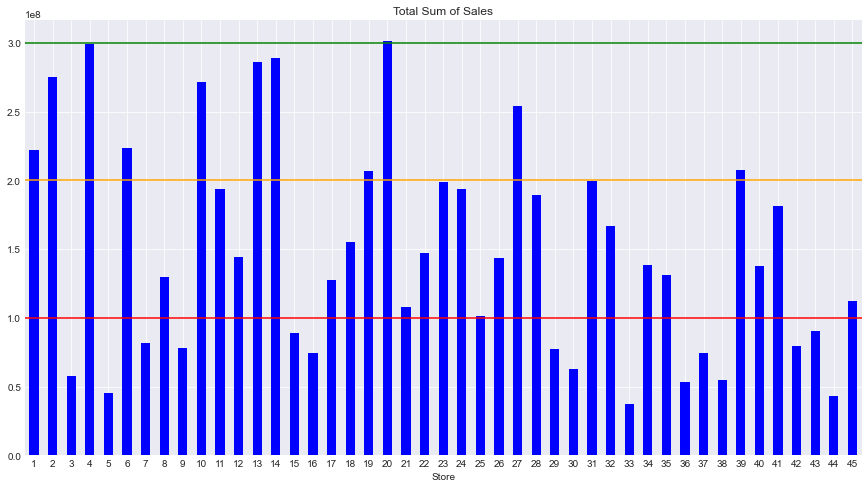

In [22]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=300000000,color = 'green')
plt.show()

A bar plot is much more conclusive and we get the following observations

Stores getting total sales below the redline are underperforming
Stores between red and orange are average
Stores between orange and green are performing above average
Stores touching the green line are very well performing

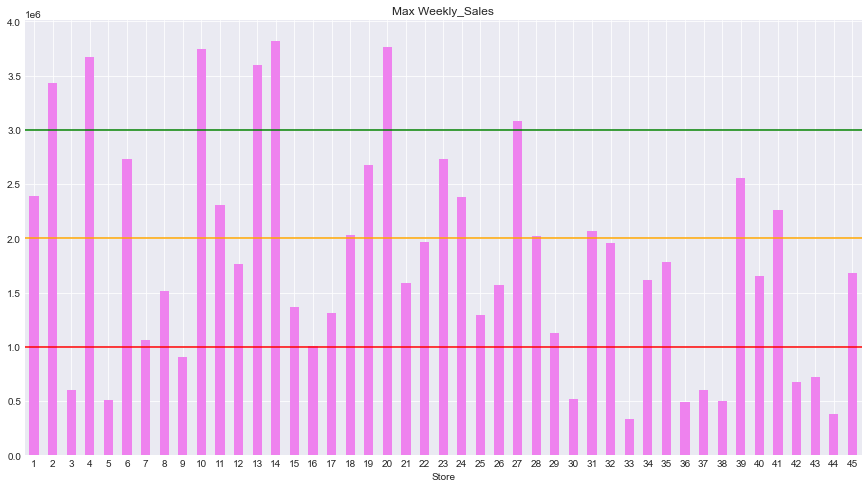

In [23]:
# drawing the bar chart  for max Weekly sales for each store

plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'max')].plot(kind = 'bar',color = 'violet')
plt.xticks(rotation = 0)
plt.title('Max Weekly_Sales')
plt.axhline(y=2000000,color = 'orange')
plt.axhline(y=1000000,color = 'red')
plt.axhline(y=3000000,color = 'green')
plt.show()

From the charts we can say that stores 4,20 are the best performing stores while 5,33,44 are the least performing

In [24]:
# check for total values in Holiday_Flag column
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [25]:
# Aggregating Weekly sales based on store and holiday flag¶

new_Store = df.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales':['mean','max','sum']})
new_Store = new_Store.reset_index()
new_Store

Store Holiday_Flag  Weekly_Sales                          
                               mean         max           sum
0      1            0  1.546957e+06  2387950.20  2.057453e+08
1      1            1  1.665748e+06  2033320.66  1.665748e+07
2      2            0  1.914209e+06  3436007.68  2.545898e+08
3      2            1  2.079267e+06  2658725.29  2.079267e+07
4      3            0  4.000648e+05   605990.41  5.320862e+07
..   ...          ...           ...         ...           ...
85    43            1  6.359463e+05   722120.04  6.359463e+06
86    44            0  3.032536e+05   376233.89  4.033273e+07
87    44            1  2.960356e+05   338737.33  2.960356e+06
88    45            0  7.821985e+05  1682862.03  1.040324e+08
89    45            1  8.362937e+05  1182500.16  8.362937e+06

[90 rows x 5 columns]

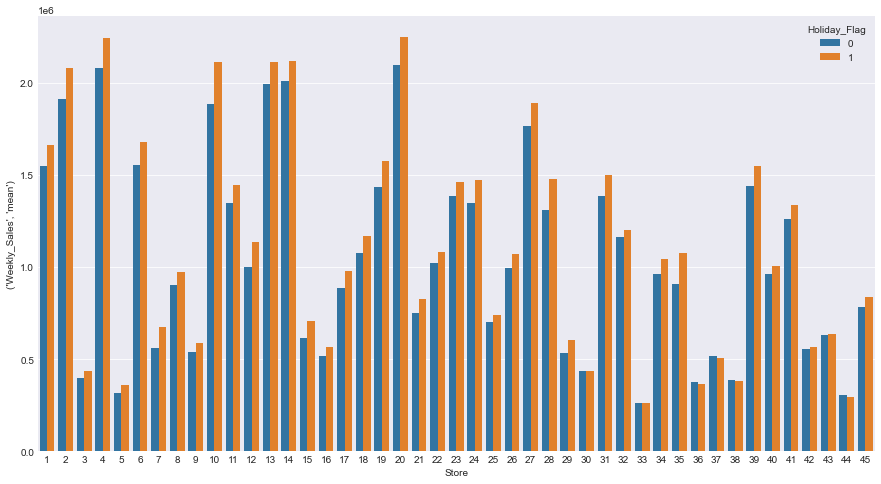

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday_Flag',data=new_Store)
plt.show()

Inference:

People generally tend to spend more during holiday weeks
The average spending is more during holiday weeks than normal weeks

# Features vs Weekly sales

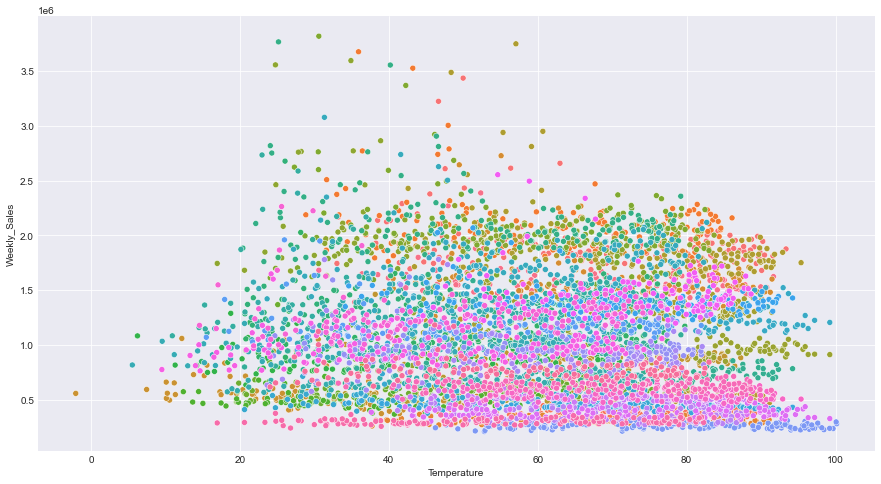

In [27]:
# Temparature vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',hue = 'Store',data = df,legend = False)
plt.show()

 We can say that temperature doesn't have much impact

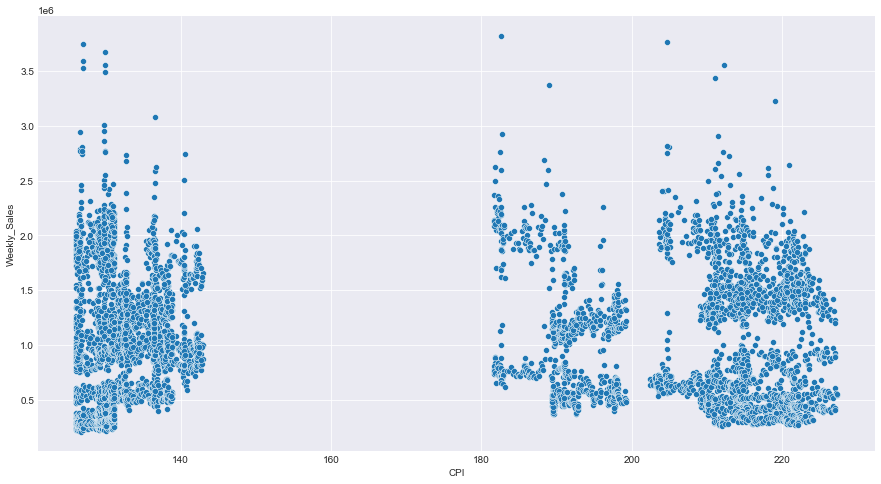

In [28]:
# CPI vs Weekly Sales


plt.figure(figsize=(15,8))
sns.scatterplot(x = 'CPI',y = 'Weekly_Sales',data = df,legend = False)
plt.show()

Again no significant pattern can be observed

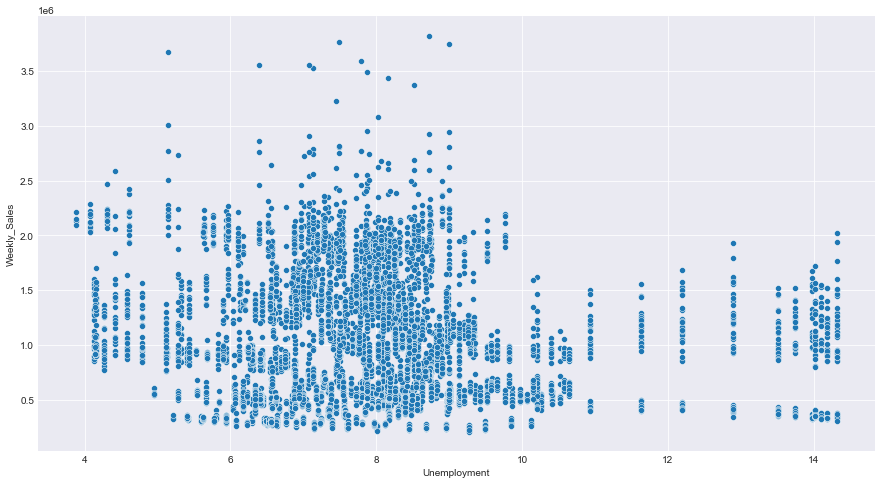

In [29]:
# Unemployment vs Week_sales


plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',data = df,legend = False)
plt.show()

Again no significant pattern can be observed

Plotting fro all features

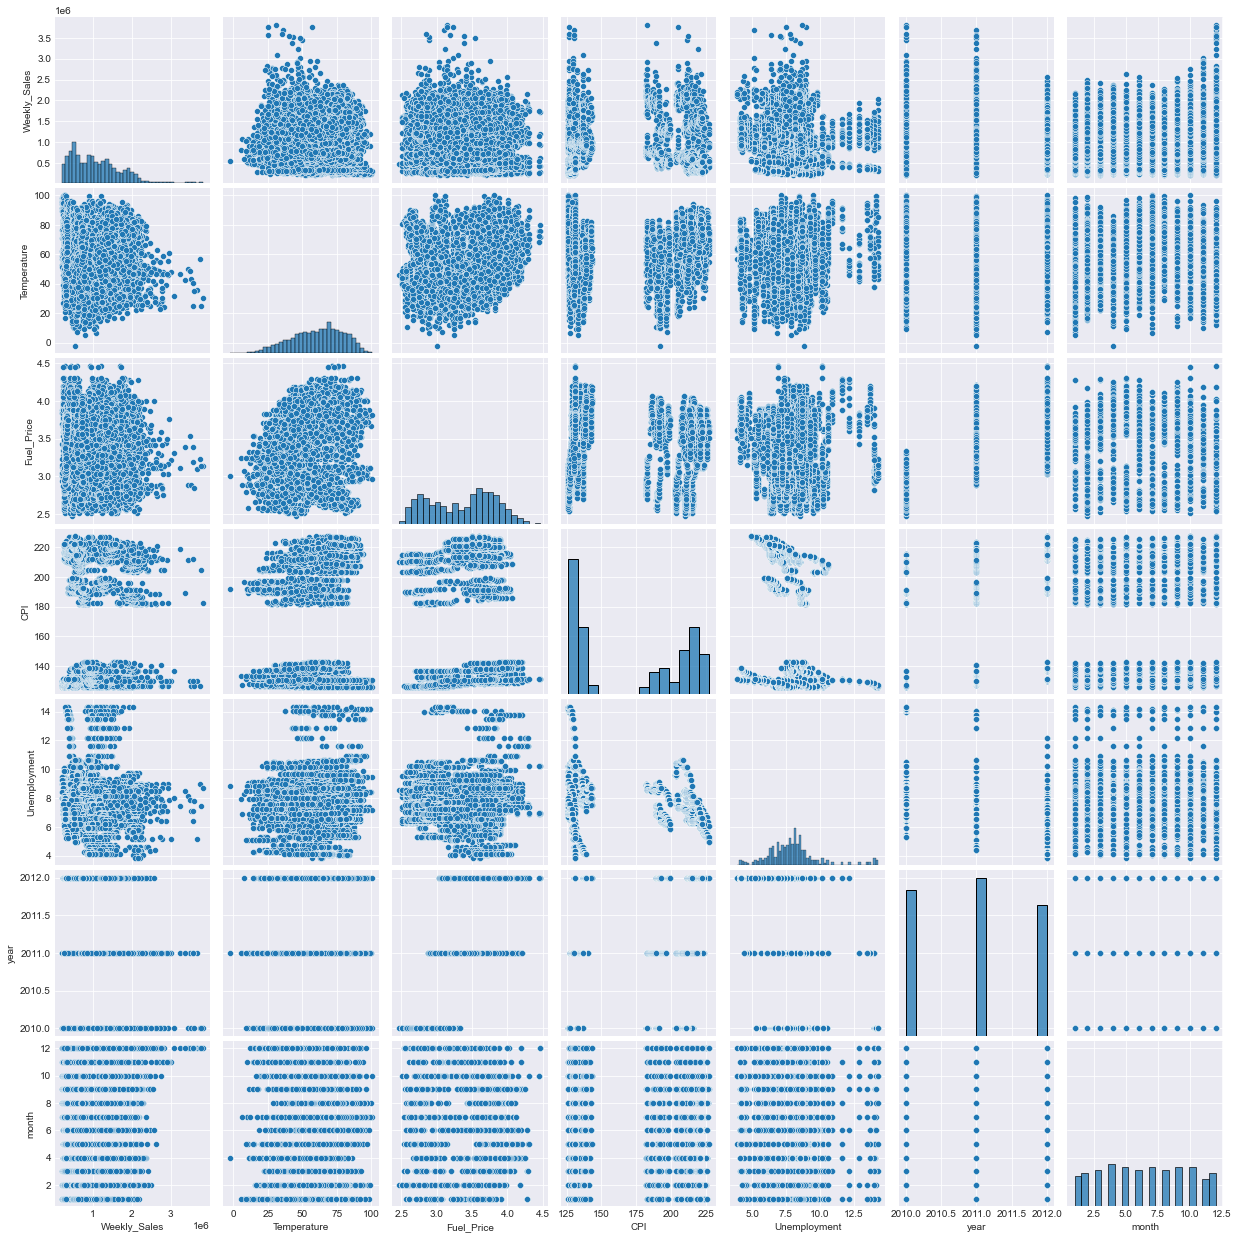

In [30]:
sns.pairplot(df)
plt.show()

Check for distribution of numerical features

Outliers

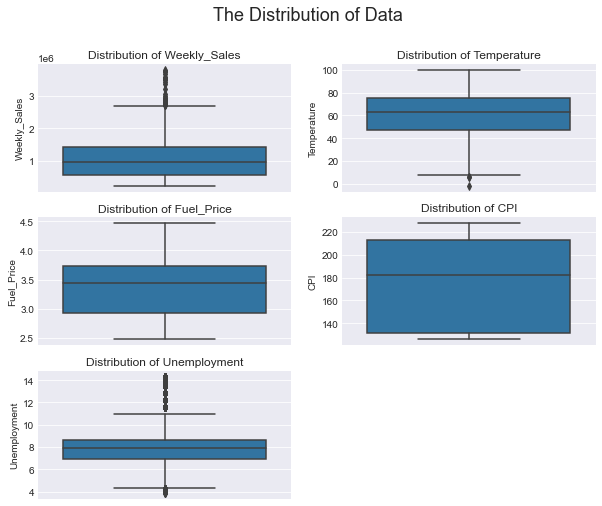

In [31]:
plt.figure(figsize=(10,8)) 
plt.suptitle('The Distribution of Data', fontsize=18)
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

REMOVING OUTLIERS

In [32]:
def remove_outlier_IQR(df, cols):
    for col in cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit= Q3+1.5*IQR
        lower_limit= Q1-1.5*IQR
        df = df[df[col] < upper_limit]
        df = df[df[col] > lower_limit]
    return df

In [33]:
df=remove_outlier_IQR(df, dist_cols)

In [34]:
# checking the shape of df after removing outliers

df.shape

(5917, 10)

we can see that the shaped has changed and the outlier features are being removed

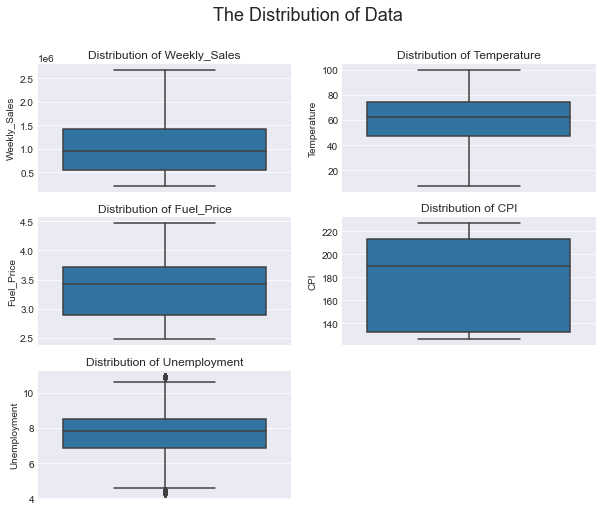

In [35]:
# checing the distribution after removing the outliers

# Now check the data after dropping the outliers
plt.figure(figsize=(10,8)) 
plt.suptitle('The Distribution of Data', fontsize=18)
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

Feature Extraction

In [36]:
# Extract the day, month, year from the Date column:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0


In [37]:
# Converting the numerical values to categorical values in the day, month, year, holiday flag columns
# Date column

days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['day'] = df['day'].map(days)
months={
1:'January',
 2:'February',
 3:'March',
 4:'April',
 5:'May',
 6:'June',
7:'July',
 8:'August',
 9:'September',
10:'October',
11:'November',
 12:'December'}
df['month']= df['month'].map(months)

# Holiday_week column
holiday_week= {1:'Holiday week', 0:'Non-holiday week'}
df['Holiday_Flag']= df['Holiday_Flag'].map(holiday_week)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,1643690.90,Non-holiday week,42.31,2.572,211.096358,8.106,2010,May,Saturday
1,1,1641957.44,Holiday week,38.51,2.548,211.242170,8.106,2010,December,Wednesday
2,1,1611968.17,Non-holiday week,39.93,2.514,211.289143,8.106,2010,February,Thursday
3,1,1409727.59,Non-holiday week,46.63,2.561,211.319643,8.106,2010,February,Thursday
4,1,1554806.68,Non-holiday week,46.50,2.625,211.350143,8.106,2010,May,Sunday


EDA & Visualization

In [38]:
# Total yearly sales

df.groupby('year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
year,
2011,2.260434e+09
2010,2.097829e+09
2012,1.791352e+09


In [39]:
# Total monthly sales

df.groupby('month')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
month,
April,5.973073e+08
May,5.639639e+08
October,5.580741e+08
July,5.510156e+08
September,5.491708e+08
June,5.278322e+08
August,5.236554e+08
March,5.100323e+08
December,4.882449e+08


In [40]:
# Total daily sales
df.groupby('day')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
day,
Thursday,4.062584e+09
Sunday,4.909649e+08
Wednesday,4.402775e+08
Monday,4.026278e+08
Saturday,4.006949e+08
Friday,2.655530e+08
Tuesday,8.691354e+07


In [41]:
sales=df.groupby(['year','month'])['Weekly_Sales'].sum().to_frame()
df_sales=pd.DataFrame(sales)
df_sales=df_sales.reset_index()
df_sales

,year,month,Weekly_Sales
0,2010,April,1.732263e+08
1,2010,August,1.744531e+08
2,2010,December,2.614204e+08
3,2010,February,1.802125e+08
4,2010,January,3.982560e+07
5,2010,July,1.739798e+08
6,2010,June,1.344962e+08
7,2010,March,1.752329e+08
8,2010,May,2.640776e+08
9,2010,November,1.355024e+08


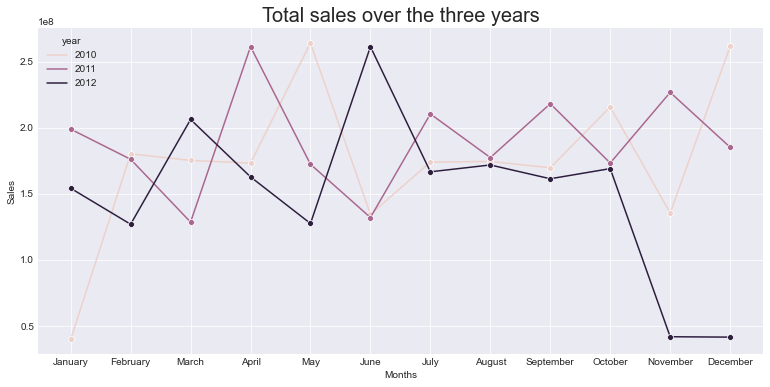

In [42]:
from calendar import month_name as mn
monthss = mn[1:]
df_sales.month = pd.Categorical(df_sales.month, categories=monthss, ordered=True)
plt.figure(figsize=(13,6))
p=sns.lineplot(data=df_sales, x='month', y='Weekly_Sales', hue='year', marker='o', ci=None)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Total sales over the three years', fontsize=20)
plt.show()

In 2010, sales jumped significantly in February and December, while sharply dropping occurred in november 2012 and stay stable on that level until the end of year.

In [43]:
# The Top 10 stores in total sales over all years

df.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(10).reset_index()

,Store,Weekly_Sales
0,20,2.800237e+08
1,14,2.761276e+08
2,2,2.687221e+08
3,13,2.682025e+08
4,10,2.556789e+08
5,27,2.480387e+08
6,4,2.446487e+08
7,1,2.224028e+08
8,6,2.210286e+08
9,39,2.074455e+08


In [44]:
df1= df[df['year']==2010]
df2= df[df['year']==2011]
df3= df[df['year']==2012]

In [45]:
# The Top 3 stores in total sales in 2010

df1.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()

,Store,Weekly_Sales
0,14,95958984.81
1,2,91841856.51
2,20,89583444.00


In [46]:
# The Top 3 stores in total sales in 2011

df2.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()

,Store,Weekly_Sales
0,14,1.027272e+08
1,4,1.016398e+08
2,20,1.006126e+08


In [47]:
# The Top 3 stores in total sales in 2012

df3.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()

,Store,Weekly_Sales
0,20,89827709.38
1,13,86707455.02
2,2,81496695.37


In [48]:
mean_CPI= df.CPI.mean()
mean_fuel_price=df.Fuel_Price.mean()

In [49]:
# Convert CPI and Fuel price columns to (Low and High)

df['CPI']= np.where(df['CPI'] <= mean_CPI,'Low','High')
df['Fuel_Price']= np.where(df['Fuel_Price'] <= mean_fuel_price,'Low','High')

In [50]:
# Convert the Temperature column to (Warm, Cool, Cold, Hot) 

df['Temperature']= np.where((df['Temperature'] <= 65) & (df['Temperature'] > 45) ,'Warm',
                            np.where((df['Temperature'] <= 45) & (df['Temperature'] > 25) ,'Cool'
                            ,
                            np.where((df['Temperature'] <= 25) & (df['Temperature'] >= 10) ,'Cold'
                            ,
                            'Hot')))

In [51]:
# Total Sales vs Fuel Price

df.groupby('Fuel_Price')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Fuel_Price,
High,3.332622e+09
Low,2.816994e+09


In [52]:
# Total Sales vs CPI

df.groupby('CPI')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
CPI,
High,3.286055e+09
Low,2.863560e+09


Walmart earn more when the Fuel price and CPI are too high.

In [53]:
# Total Sales vs Temperature

df.groupby('Temperature')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Temperature,
Hot,2.759108e+09
Warm,2.023666e+09
Cool,1.176644e+09
Cold,1.901981e+08


People spend more money in walmart in hot and warm weather.

In [75]:
# Total Sales vs Holiday_Flag
df.groupby('Holiday_Flag')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Holiday_Flag,
Non-holiday week,5.704333e+09
Holiday week,4.452825e+08


In [76]:
df['TempCode'] = pd.factorize(df.Temperature)[0]

In [77]:
df.Temperature.value_counts()

Hot     2702
Warm    1924
Cool    1084
Cold     207
Name: Temperature, dtype: int64

In [78]:
df.TempCode.value_counts()

2    2702
1    1924
0    1084
3     207
Name: TempCode, dtype: int64

In [80]:
df['Holiday_Code'] = pd.factorize(df.Holiday_Flag)[0]

In [81]:
df.Holiday_Flag.value_counts()

Non-holiday week    5508
Holiday week         409
Name: Holiday_Flag, dtype: int64

In [82]:
df.Holiday_Code.value_counts()

0    5508
1     409
Name: Holiday_Code, dtype: int64

# Machine Learning

Choosing the Algorithm for the Project
Motivation and Reasons For Choosing the Algorithm

LOGISTIC REGRESSION
In the given Walmart data we can see that there is a dependent variables which forms binary classification condition by depending upon certain independent variables.
The Weekly sales feature depends on various factors like Temperature, unemployment rate, CPI, Fuel prices etc based on which we can predcit the value of
weekly sales (one variable) based on the value of another variable (independent ones). By using logistic regression we can Predict, forecast and reduce the error.

Model Evaluation and Techniques

Adding dummy variables for Categorical features

In [56]:
df_dummies = pd.get_dummies(df,columns=['Store','Holiday_Flag'])
print(df_dummies.columns.to_list())

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_Non-holiday week', 'Holiday_Flag_Holiday week']


Import the function train_test_split from sklearn.model_selection
Split our df in X made of all features except Date,Weekly_Sales and y made of the feature Weekly_Sales
Use train_test_split with a test_size=0.20 (20 % of inputs became the test set) in following way to obtain a train set and a test set.

In [87]:
# Categorical to Dummy Variables
df =  pd.get_dummies(df, columns=["Store", "Holiday_Flag", "day", "month", "year"],
                         prefix=["Store", "Holiday_Flag", "day", "month", "year"],
                         drop_first=True)
df.head(2)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Code,TempCode,Holiday_Code,Store_2,Store_3,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2011,year_2012
0,1643690.90,Cool,Low,High,8.106,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1641957.44,Cool,Low,High,8.106,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Separating target variable and predictors

y = df ['Weekly_Sales']
x = df.drop(['Weekly_Sales'], axis =1)

In [ ]:
# Normalization data to bring all values to common scale
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:1]

In [ ]:
# splitting data into training and test data at 80% and 20% respectively

from sklearn.model_selection import train_test_split
xm_train, xm_test, ym_train, ym_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [ ]:
lr = lm.LinearRegression()
lr.fit(xm_train, ym_train)
y_pred = lr.predict(xm_test)
print("mean square error: ", mean_squared_error(ym_test, y_pred))
print("variance or r-squared: ", explained_variance_score(ym_test, y_pred))

In [ ]:
mean square error:  20428137697.857597
variance or r-squared:  0.9369193227967636

# INFERENCES FROM THE MODEL

(i) Our first hypothesis is, does these independent variables or predictors have influence on sales that is the dependent or target variable which will enable us to make better decisions. From the regression analysis, our model built showed influence or relationship between the predictors and the response(sales). Let us first talk about store or location and sales. There exist a negative relationship between locations or stores and sales. Meaning, as the number of locations or stores increases, sales decreases and vice versa. In reality, we expect that the increase in the locations or stores should bring in more sales. But perhaps, these stores are not located at the right places. For instance, a store in the middle of a desert will not make sales more than a store in New York city. Other predictors with negative relationships with sales are Unemployment, consumer price index(CPI), Temperature etc. We can also talk about the relationship between fuel prices and sales. Our analysis showed a positive relationship between fuel price and sales. In general, an increase fuel price causes prices of items to go up. In view of this phenomenon, we would expect customers or consumers decrease purchases. But this is not the case, consumers are purchasing at a marginal rate. It is not surprising since Walmart is an groceries store which deals with necessities. We need groceries to survive, therefore an increase in fuel prices will not stop consumers from buy from Walmart.



(2) The second hypothesis states that the predictors or independent variables have a high chance of giving us a good predictive model in predicting sales. Our predictive modeling results showed a higher coefficient determination(R2). Meaning, the predictors are good in predicting sales. The top five independent variables that are important in predicting sales are all from locations or stores. This tells us that, location is very important in predicting sales.

(3) Another findings is holidays promotions worked perfectly well and there is a positive relationship existing between sales and holidays. Therefore, on holidays stores must be stocked in order not to run out.

(4) With unemployment, the negative relationship with sales should give a signal that anytime consumers or customers are employed, their purchasing power will go up thereby increasing the demand for items. Stores must stock up with items anytime unemployment index goes down.

(5) The increase in fuel price should not scare store managers in stocking up since Walmart sells necessities. Increase in fuel prices does not affect groceries since consumer needs groceries to survive.

# Future Possibilities of the Project

In [ ]:
Deep learning can also be applied in predicting sales